In [1]:
import pandas as pd 

In [2]:
from  matplotlib import pyplot as plt

In [41]:
campaign_to_negative_keyword = pd.read_csv("campaign_to_negative_keyword_mapping.csv")

In [42]:
campaign_to_negative_keyword.dropna()

,campaign_name,negative_keyword_text
0,UBCOMFORTERQUEENWHITE2-AUTO,duvet inserts queen size
1,UBCOMFORTERQUEENWHITE2-AUTO,comforters for queen bed
2,UBCOMFORTERQUEENWHITE2-AUTO,comforter
3,UBCOMFORTERQUEENWHITE2-AUTO,queen comforter
4,UBCOMFORTERQUEENWHITE2-AUTO,duvet
...,...,...
21705,UBMICROFIBER4PCTWINBLACK-AUTO,white
21706,UBMICROFIBER4PCTWINBLACK-AUTO,queen
21707,UBMICROFIBER4PCTWINBLACK-AUTO,king
21708,UBMICROFIBER4PCTWINBLACK-AUTO,full


In [43]:
campaign_to_negative_keyword.columns

Index(['campaign_name', 'negative_keyword_text'], dtype='object')

In [45]:
campaign_to_negative_keyword.columns = (
    campaign_to_negative_keyword.columns
      .str.replace(r'\(.*?\)', '', regex=True)  # remove (Informational only)
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)

campaign_to_negative_keyword.columns

Index(['campaign_name', 'negative_keyword_text'], dtype='object')

In [46]:
campaign_to_negative_keyword['campaign_name'].unique()

array(['UBCOMFORTERQUEENWHITE2-AUTO', 'NYTBATHROBEMENBASIC - Auto',
       'UWTNECK Catchall',
       'NYTTACTICALPOLOMEN1PC - Group A (mens polo shirts short sleeve)',
       'NYTUSCRUBWOMEN3PC - AUTO ( CATCH ALL )',
       'UHHANGERPLASTICWHITE50- Auto - Substitutes - Catchall',
       'NYTBATHROBEMENBASIC - Broad - (mens robe)',
       'UBCOMFORTERQUEENWHITE2 - Product Targeting',
       'NYTBATHROBEWOMENHOOD - Black (BM)',
       'KYCOOKWARE5PCSSETNEW - Group A - pots and pans set non stick',
       'UBCOTTONSQUAREPILLOW20x202 - Exact Group B1',
       'NYTUSCRUBWOMEN1PC - AUTO ( CATCH ALL )',
       'NYTBATHROBEWOMENHOOD - Pink (BM)',
       'UWTNECKBLACKL - Group A2 (turtleneck men)',
       'NYTBATHROBEWOMENHOODSTEELGREY - Auto',
       'UTHANDTOWELPREMIUM-6PACK-Auto-Colors',
       'NYTTNECKWOMEN1PC - Group A ( turtleneck tops for women )',
       'UHHANGERPLASTICWHITE50- Cat Tar - Standard Hangers',
       'UKFRYPAN3PCSRVT - Auto | Low Bids',
       'UBCFKMATTRESSPROTECTORFULL

In [48]:
keyword_count_per_campaign = (
    campaign_to_negative_keyword.groupby('campaign_name')['negative_keyword_text']
      .nunique()        # use .count() if duplicates are allowed
      .reset_index(name='keyword_count')
)
keyword_count_per_campaign

,campaign_name,keyword_count
0,KYCOOKWARE5PCSSETNEW - Group A - pots and pans...,17
1,MHBATHMAT17X24-2PACKGREY - MT,11
2,MHBATHMAT20X32KSAGEGREEN - AUTO,2
3,MHBATHMATSHAGG20X30-2PKGREY - MT,9
4,NYTATHLETICSHORTSMEN1PC - BLACK (BM),9
...,...,...
632,UWTNECKWHITEL-AUTO,24
633,Washcloths Auto - Catalog,328
634,YLBABYWALKERPREMBLUE - PAT - VTECH,2
635,ubmicrofibergussetpillowfilledking4 - auto,161


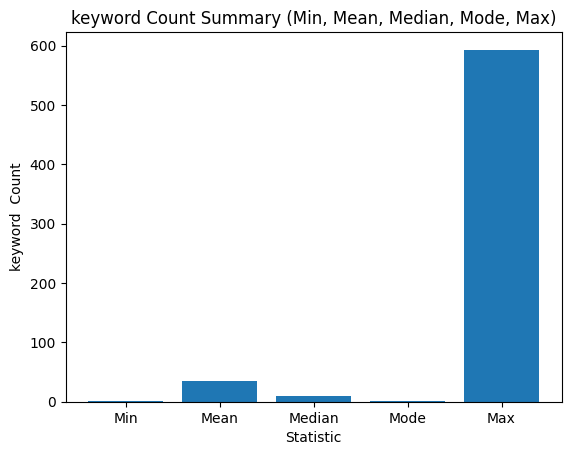

In [49]:
data = keyword_count_per_campaign['keyword_count']

# Calculate statistics
stats = {
    'Min': data.min(),
    'Mean': data.mean(),
    'Median': data.median(),
    'Mode': data.mode().iloc[0] if not data.mode().empty else 0,
    'Max': data.max()
}

# Plot bar chart
plt.figure()
plt.bar(stats.keys(), stats.values())
plt.xlabel('Statistic')
plt.ylabel('keyword  Count')
plt.title('keyword Count Summary (Min, Mean, Median, Mode, Max)')
plt.show()

In [50]:
keyword_count_per_campaign[keyword_count_per_campaign['keyword_count']==keyword_count_per_campaign['keyword_count'].max()]

,campaign_name,keyword_count
149,UBFLANNELFLEECEKINGTURQUOISE - Group C,593


In [51]:
keyword_count_per_campaign['keyword_count'].mean()

np.float64(34.08163265306123)

In [52]:
import os

In [53]:
os.listdir('data_maps')

['ad_group_id_to_name_map.csv',
 'asin_informational_only_to_name_map.csv',
 'campaign_id_to_ad_group_id_map.csv',
 'campaign_id_to_name_map.csv',
 'campaign_name_to_ad_group_name_map.csv',
 'campaign_name_to_keyword_map.csv',
 'campaign_to_keyword_mapping.csv',
 'campaign_to_negative_keyword_mapping.csv',
 'keyword_id_to_name_map.csv',
 'sku_to_campaign_name_map.csv']